# Task 5 Answering Research Questions

## Research Questions

- How has the frequency of swear words in pop songs changed over the years?

It should be noted that due to the nature of the dataset, there is a certain bias towards what pool our data is pooled from.
Kidz Bop naturally doesn't cover all songs in existence, instead opting towards covering songs that are deemed mainstream or most popular. Therefore our research question is a bit more specific, in that we wonder if the frequency of swear words in pop songs chosen by KidzBop, i.e deemed most popular in media as seen by KidzBop, has changed over the years?

In [2]:
import os

In [3]:
from scripts import project_functions as pf

In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pf.load_df('data/raw/KB_censored-lyrics.csv')
df.head()

,ogArtist,songName,badWord,count,category,year,ogLyric,kbLyric
0,Ariana Grande,7 rings,bitch,2,profanity,2019,Bought matching diamonds for six of my bitches,Bought matching diamonds so they know what thi...
1,Britney Spears,till the world ends,blow,1,alcohol & drugs,2011,"Baby, let me blow your mind tonight","Baby, come on wave your hands tonight"
2,Britney Spears,till the world ends,blow,2,alcohol & drugs,2011,"Baby, let me blow your mind tonight","Baby, come on wave your hands tonight"
3,Britney Spears,till the world ends,touch,1,sexual,2011,"Get you off with the touch, dancing in the dark",Set it off with a track dancing in the dark
4,Elle King,ex's and oh's,high,1,alcohol & drugs,2016,"I get high, and I love to get low","I get by, and I love to lay low"


## Finding the amount of songs that have swear words in them by year

In [7]:
df['year'].value_counts()

2019    189
2015    171
2017    170
2018    127
2016    109
2010     89
2012     80
2014     76
2013     73
2009     67
2007     64
2011     35
2008     33
2006     28
2002     19
2003      8
2004      7
2005      5
2001      3
Name: year, dtype: int64

### Formally plotting this in a histogram

Text(0.5, 1.0, 'Frequency of swear words over years')

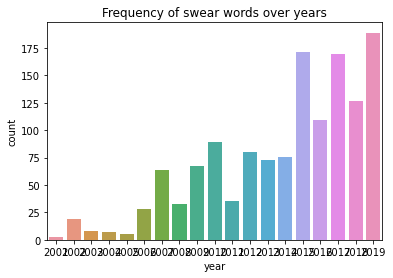

In [9]:
sns.countplot(data=df,
              x=df['year'],
              order = df['year'].sort_values().drop_duplicates()
             )
plt.title('Frequency of swear words over years')

In [29]:
df_YearGroup = df.groupby(by='year')
df_YearGroup.get_group(2002)
list0 = list()

for i in range(2001,2020):
    list0.append([i,df_YearGroup.get_group(i)['badWord'].value_counts().index[0],df_YearGroup.get_group(i)['badWord'].value_counts()[0]])
df_badWordbyYear = pd.DataFrame(list0).rename(columns={0:'year',1:'badWord',2:'value'})
df_badWordbyYear

,year,badWord,value
0,2001,hip,1
1,2002,freak,4
2,2003,man,3
3,2004,man,3
4,2005,shit,2
5,2006,damn,6
6,2007,man,8
7,2008,suicidal,8
8,2009,shit,9
9,2010,kiss,8


In [38]:
df_fWord = df[df['badWord']=='fuck']
df_fWord= (pd.DataFrame(df_fWord['year']
                        .value_counts())
           .reset_index()
           .rename(columns={'year':'value','index':'year'})
           .sort_values(by='year', ascending = False)
           .reset_index()
           .drop(columns='index')
          )
df_fWord

,year,value
0,2019,32
1,2018,2
2,2017,8
3,2016,10
4,2015,2
5,2014,4
6,2013,11
7,2012,4
8,2011,2
9,2010,3


Text(0.5, 1.0, 'Usage of the f word over the years')

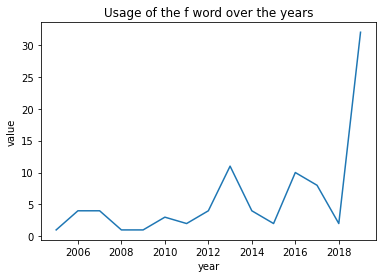

In [32]:
sns.lineplot(data=df_fWord, x='year', y='value')
plt.title('Usage of the f word over the years')

In [40]:
df['ogArtist'].value_counts().iloc[:5]

Macklemore & Ryan Lewis    52
Ed Sheeran                 48
Maroon 5                   47
Taylor Swift               46
Drake                      41
Name: ogArtist, dtype: int64

<AxesSubplot:xlabel='count', ylabel='ogArtist'>

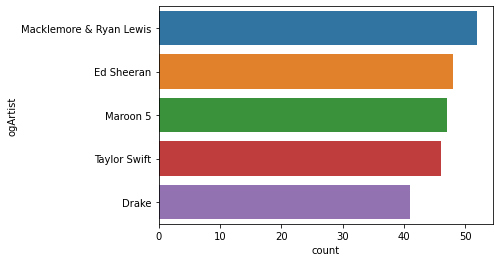

In [44]:
sns.countplot(data=df,
              y='ogArtist',
              order = df['ogArtist'].value_counts().iloc[:5].index
             )

In [59]:
df_YearGroup.get_group(2001)['ogArtist'].value_counts()
list1 = list()

for i in range(2001,2020):
    list1.append([i, df_YearGroup.get_group(i)['ogArtist'].value_counts().index[0], df_YearGroup.get_group(i)['ogArtist'].value_counts()[0]])
df_badWordbyArtist = pd.DataFrame(list1).rename(columns={0:'year',1:'ogArtist',2:'value'})
df_badWordbyArtist

,year,ogArtist,value
0,2001,LFO,1
1,2002,Evan & Jaron,4
2,2003,Baha Men,3
3,2004,Jet (band),3
4,2005,The Black Eyed Peas,2
5,2006,The Black Eyed Peas,11
6,2007,Fergie,16
7,2008,Sean Kingston,15
8,2009,The Black Eyed Peas,12
9,2010,Lady Gaga,27
